In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from datetime import date

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Importing the warning library
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv data file
surprise_housing_df = pd.read_csv('train.csv') 

In [3]:
# Fetch top 5 rows in the dataframe

surprise_housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Dictionary

+ MSSubClass: Identifies the type of dwelling involved in the sale.    

		20    1-STORY 1946 & NEWER ALL STYLES
		30    1-STORY 1945 & OLDER
		40    1-STORY W/FINISHED ATTIC ALL AGES
		45    1-1/2 STORY + UNFINISHED ALL AGES
		50    1-1/2 STORY FINISHED ALL AGES
		60    2-STORY 1946 & NEWER
		70    2-STORY 1945 & OLDER
		75    2-1/2 STORY ALL AGES
		80    SPLIT OR MULTI-LEVEL
		85    SPLIT FOYER
		90    DUPLEX + ALL STYLES AND AGES
		120    1-STORY PUD (Planned Unit Development) + 1946 & NEWER
		150    1-1/2 STORY PUD + ALL AGES
		160    2-STORY PUD + 1946 & NEWER
		180    PUD + MULTILEVEL + INCL SPLIT LEV/FOYER
		190    2 FAMILY CONVERSION + ALL STYLES AND AGES

 + MSZoning: Identifies the general zoning classification of the sale.
        
		A    Agriculture
		C    Commercial
		FV    Floating Village Residential
		I    Industrial
		RH    Residential High Density
		RL    Residential Low Density
		RP    Residential Low Density Park 
		RM    Residential Medium Density
    
- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet

+ Street: Type of road access to property

		Grvl    Gravel    
		Pave    Paved
		    

+ Alley: Type of alley access to property

		Grvl    Gravel
		Pave    Paved
		NA     No alley access
        
+ LotShape: General shape of property

		Reg    Regular    
		IR1    Slightly irregular
		IR2    Moderately Irregular
		IR3    Irregular
		
+ LandContour: Flatness of the property

		Lvl    Near Flat/Level    
		Bnk    Banked + Quick and significant rise from street grade to building
		HLS    Hillside + Significant slope from side to side
		Low    Depression
        
+ Utilities: Type of utilities available
        
		AllPub    All public Utilities (E,G,W,& S)    
		NoSewr    Electricity, Gas, and Water (Septic Tank)
		NoSeWa    Electricity and Gas Only
		ELO    Electricity only    
    
+ LotConfig: Lot configuration

		Inside    Inside lot
		Corner    Corner lot
		CulDSac    Cul-de-sac
		FR2    Frontage on 2 sides of property
		FR3    Frontage on 3 sides of property
    
+ LandSlope: Slope of property
        
		Gtl    Gentle slope
		Mod    Moderate Slope    
		Sev    Severe Slope
    
+ Neighborhood: Physical locations within Ames city limits

		Blmngtn    Bloomington Heights
		Blueste    Bluestem
		BrDale    Briardale
		BrkSide    Brookside
		ClearCr    Clear Creek
		CollgCr    College Creek
		Crawfor    Crawford
		Edwards    Edwards
		Gilbert    Gilbert
		IDOTRR    Iowa DOT and Rail Road
		MeadowV    Meadow Village
		Mitchel    Mitchell
		Names    North Ames
		NoRidge    Northridge
		NPkVill    Northpark Villa
		NridgHt    Northridge Heights
		NWAmes    Northwest Ames
		OldTown    Old Town
		SWISU    South & West of Iowa State University
		Sawyer    Sawyer
		SawyerW    Sawyer West
		Somerst    Somerset
		StoneBr    Stone Brook
		Timber    Timberland
		Veenker    Veenker
            
+ Condition1: Proximity to various conditions
    
		Artery    Adjacent to arterial street
		Feedr    Adjacent to feeder street    
		Norm    Normal    
		RRNn    Within 200' of North-South Railroad
		RRAn    Adjacent to North-South Railroad
		PosN    Near positive off-site feature--park, greenbelt, etc.
		PosA    Adjacent to postive off-site feature
		RRNe    Within 200' of East-West Railroad
		RRAe    Adjacent to East-West Railroad
    
+ Condition2: Proximity to various conditions (if more than one is present)
        
		Artery    Adjacent to arterial street
		Feedr    Adjacent to feeder street    
		Norm    Normal    
		RRNn    Within 200' of North-South Railroad
		RRAn    Adjacent to North-South Railroad
		PosN    Near positive off-site feature--park, greenbelt, etc.
		PosA    Adjacent to postive off-site feature
		RRNe    Within 200' of East-West Railroad
		RRAe    Adjacent to East-West Railroad
    
+ BldgType: Type of dwelling
        
		1Fam    Single-family Detached    
		2FmCon    Two-family Conversion; originally built as one-family dwelling
		Duplx    Duplex
		TwnhsE    Townhouse End Unit
		TwnhsI    Townhouse Inside Unit
    
+ HouseStyle: Style of dwelling
    
		1Story    One story
		1.5Fin    One and one-half story: 2nd level finished
		1.5Unf    One and one-half story: 2nd level unfinished
		2Story    Two story
		2.5Fin    Two and one-half story: 2nd level finished
		2.5Unf    Two and one-half story: 2nd level unfinished
		SFoyer    Split Foyer
		SLvl    Split Level
    
+ OverallQual: Rates the overall material and finish of the house

		10    Very Excellent
		9    Excellent
		8    Very Good
		7    Good
		6    Above Average
		5    Average
		4    Below Average
		3    Fair
		2    Poor
		1    Very Poor
    
+ OverallCond: Rates the overall condition of the house

		10    Very Excellent
		9    Excellent
		8    Very Good
		7    Good
		6    Above Average    
		5    Average
		4    Below Average    
		3    Fair
		2    Poor
		1    Very Poor
        
- YearBuilt: Original construction date

- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

+ RoofStyle: Type of roof

		Flat    Flat
		Gable    Gable
		Gambrel    Gabrel (Barn)
		Hip    Hip
		Mansard    Mansard
		Shed    Shed
        
+ RoofMatl: Roof material

		ClyTile    Clay or Tile
		CompShg    Standard (Composite) Shingle
		Membran    Membrane
		Metal    Metal
		Roll    Roll
		Tar&Grv    Gravel & Tar
		WdShake    Wood Shakes
		WdShngl    Wood Shingles
        
+ Exterior1st: Exterior covering on house

		AsbShng    Asbestos Shingles
		AsphShn    Asphalt Shingles
		BrkComm    Brick Common
		BrkFace    Brick Face
		CBlock    Cinder Block
		CemntBd    Cement Board
		HdBoard    Hard Board
		ImStucc    Imitation Stucco
		MetalSd    Metal Siding
		Other    Other
		Plywood    Plywood
		PreCast    PreCast    
		Stone    Stone
		Stucco    Stucco
		VinylSd    Vinyl Siding
		Wd Sdng    Wood Siding
		WdShing    Wood Shingles
    
+ Exterior2nd: Exterior covering on house (if more than one material)

		AsbShng    Asbestos Shingles
		AsphShn    Asphalt Shingles
		BrkComm    Brick Common
		BrkFace    Brick Face
		CBlock    Cinder Block
		CemntBd    Cement Board
		HdBoard    Hard Board
		ImStucc    Imitation Stucco
		MetalSd    Metal Siding
		Other    Other
		Plywood    Plywood
		PreCast    PreCast
		Stone    Stone
		Stucco    Stucco
		VinylSd    Vinyl Siding
		Wd Sdng    Wood Siding
		WdShing    Wood Shingles
    
+ MasVnrType: Masonry veneer type

		BrkCmn    Brick Common
		BrkFace    Brick Face
		CBlock    Cinder Block
		None    None
		Stone    Stone
    
- MasVnrArea: Masonry veneer area in square feet

+ ExterQual: Evaluates the quality of the material on the exterior 
        
		Ex    Excellent
		Gd    Good
		TA    Average/Typical
		Fa    Fair
		Po    Poor
        
+ ExterCond: Evaluates the present condition of the material on the exterior
        
		Ex    Excellent
		Gd    Good
		TA    Average/Typical
		Fa    Fair
		Po    Poor
        
+ Foundation: Type of foundation
        
		BrkTil    Brick & Tile
		CBlock    Cinder Block
		PConc    Poured Contrete    
		Slab    Slab
		Stone    Stone
		Wood    Wood
        
+ BsmtQual: Evaluates the height of the basement

		Ex    Excellent (100+ inches)    
		Gd    Good (90-99 inches)
		TA    Typical (80-89 inches)
		Fa    Fair (70-79 inches)
		Po    Poor (<70 inches
		NA    No Basement
        
+ BsmtCond: Evaluates the general condition of the basement

		Ex    Excellent
		Gd    Good
		TA    Typical + slight dampness allowed
		Fa    Fair + dampness or some cracking or settling
		Po    Poor + Severe cracking, settling, or wetness
		NA    No Basement
    
+ BsmtExposure: Refers to walkout or garden level walls

		Gd    Good Exposure
		Av    Average Exposure (split levels or foyers typically score average or above)    
		Mn    Mimimum Exposure
		No    No Exposure
		NA    No Basement
    
+ BsmtFinType1: Rating of basement finished area

		GLQ    Good Living Quarters
		ALQ    Average Living Quarters
		BLQ    Below Average Living Quarters    
		Rec    Average Rec Room
		LwQ    Low Quality
		Unf    Unfinshed
		NA    No Basement
        
- BsmtFinSF1: Type 1 finished square feet

+ BsmtFinType2: Rating of basement finished area (if multiple types)

		GLQ    Good Living Quarters
		ALQ    Average Living Quarters
		BLQ    Below Average Living Quarters    
		Rec    Average Rec Room
		LwQ    Low Quality
		Unf    Unfinshed
		NA    No Basement

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

+ Heating: Type of heating
        
		Floor    Floor Furnace
		GasA    Gas forced warm air furnace
		GasW    Gas hot water or steam heat
		Grav    Gravity furnace    
		OthW    Hot water or steam heat other than gas
		Wall    Wall furnace
        
+ HeatingQC: Heating quality and condition

		Ex    Excellent
		Gd    Good
		TA    Average/Typical
		Fa    Fair
		Po    Poor
        
+ CentralAir: Central air conditioning

		N    No
		Y    Yes
        
+ Electrical: Electrical system

		SBrkr    Standard Circuit Breakers & Romex
		FuseA    Fuse Box over 60 AMP and all Romex wiring (Average)    
		FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
		FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
		Mix    Mixed
        
-  1stFlrSF: First Floor square feet
 
-  2ndFlrSF: Second floor square feet

-  LowQualFinSF: Low quality finished square feet (all floors)

-  GrLivArea: Above grade (ground) living area square feet

-  BsmtFullBath: Basement full bathrooms

-  BsmtHalfBath: Basement half bathrooms

-  FullBath: Full bathrooms above grade

-  HalfBath: Half baths above grade

-  Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

-  Kitchen: Kitchens above grade

+  KitchenQual: Kitchen quality

		Ex    Excellent
		Gd    Good
		TA    Typical/Average
		Fa    Fair
		Po    Poor
		    
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

+ Functional: Home functionality (Assume typical unless deductions are warranted)

		Typ    Typical Functionality
		Min1    Minor Deductions 1
		Min2    Minor Deductions 2
		Mod    Moderate Deductions
		Maj1    Major Deductions 1
		Maj2    Major Deductions 2
		Sev    Severely Damaged
		Sal    Salvage only
        
- Fireplaces: Number of fireplaces

+ FireplaceQu: Fireplace quality

		Ex    Excellent + Exceptional Masonry Fireplace
		Gd    Good + Masonry Fireplace in main level
		TA    Average + Prefabricated Fireplace in main living area or Masonry Fireplace in basement
		Fa    Fair + Prefabricated Fireplace in basement
		Po    Poor + Ben Franklin Stove
		NA    No Fireplace
        
+ GarageType: Garage location
        
		2Types    More than one type of garage
		Attchd    Attached to home
		Basment    Basement Garage
		BuiltIn    Built-In (Garage part of house + typically has room above garage)
		CarPort    Car Port
		Detchd    Detached from home
		NA    No Garage
        
+ GarageYrBlt: Year garage was built
        
+ GarageFinish: Interior finish of the garage

		Fin    Finished
		RFn    Rough Finished    
		Unf    Unfinished
		NA    No Garage
        
+ GarageCars: Size of garage in car capacity

+ GarageArea: Size of garage in square feet

+ GarageQual: Garage quality

		Ex    Excellent
		Gd    Good
		TA    Typical/Average
		Fa    Fair
		Po    Poor
		NA    No Garage
        
+ GarageCond: Garage condition

		Ex    Excellent
		Gd    Good
		TA    Typical/Average
		Fa    Fair
		Po    Poor
		NA    No Garage
        
+ PavedDrive: Paved driveway

		Y    Paved 
		P    Partial Pavement
		N    Dirt/Gravel
        
- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

+ PoolQC: Pool quality
        
		Ex    Excellent
		Gd    Good
		TA    Average/Typical
		Fa    Fair
		NA    No Pool
        
+ Fence: Fence quality
        
		GdPrv    Good Privacy
		MnPrv    Minimum Privacy
		GdWo    Good Wood
		MnWw    Minimum Wood/Wire
		NA    No Fence
    
+ MiscFeature: Miscellaneous feature not covered in other categories
        
		Elev    Elevator
		Gar2    2nd Garage (if not described in garage section)
		Othr    Other
		Shed    Shed (over 100 SF)
		TenC    Tennis Court
		NA    None
        
- MiscVal: $Value of miscellaneous feature

- MoSold: Month Sold (MM)

- YrSold: Year Sold (YYYY)

+ SaleType: Type of sale
        
		WD     Warranty Deed + Conventional
		CWD    Warranty Deed + Cash
		VWD    Warranty Deed + VA Loan
		New    Home just constructed and sold
		COD    Court Officer Deed/Estate
		Con    Contract 15% Down payment regular terms
		ConLw    Contract Low Down payment and low interest
		ConLI    Contract Low Interest
		ConLD    Contract Low Down
		Oth    Other
        
+ SaleCondition: Condition of sale

		Normal    Normal Sale
		Abnorml    Abnormal Sale +  trade, foreclosure, short sale
		AdjLand    Adjoining Land Purchase
		Alloca    Allocation + two linked properties with separate deeds, typically condo with a garage unit    
		Family    Sale between family members
		Partial    Home was not completed when last assessed (associated with New Homes)

In [4]:
# Dropping the 'Id' column

surprise_housing_df.drop(columns = ['Id'], inplace = True)

# info() prints information about the dataframe

surprise_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# Displaying the number of entries in the dataframe

len(surprise_housing_df.index)

1460

In [6]:
# Displaying the number of rows and columns in the dataframe

surprise_housing_df.shape

(1460, 80)

### Data Pre-processing

In [7]:
# Method which takes dataframe as input and returns null value percent
# of each column in the dataset in descending order.

def feature_null_value_percent(data_frame):
    percent = round((data_frame.isnull().sum() * 100) / len(surprise_housing_df), 2).sort_values(ascending=False)
    return percent[percent != 0]

In [8]:
feature_null_value_percent(surprise_housing_df)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [9]:
# Features for which NA / None has a definition as per the data dictionary

# Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu,
# GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature, MasVnrType

features_with_NA_acceptable = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                             'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
                             'Fence', 'MiscFeature', 'MasVnrType']


for feature in features_with_NA_acceptable:
    surprise_housing_df[feature].fillna('Not Applicable', inplace = True)
    
    
feature_null_value_percent(surprise_housing_df)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [10]:
# From the data dictionary data, we can impute missing values of MasVnrArea
# with meadian values

surprise_housing_df['MasVnrArea'].fillna(surprise_housing_df['MasVnrArea'].median(), inplace = True)

# And also we can impute GarageYrBlt with YearBuilt assuming Garage is build at
# the time of builing the house

surprise_housing_df['GarageYrBlt'].fillna(surprise_housing_df['YearBuilt'], inplace = True)

feature_null_value_percent(surprise_housing_df)

LotFrontage    17.74
Electrical      0.07
dtype: float64

In [11]:
# Dropping LotFrontage columns as it has many missing values

surprise_housing_df.drop(columns=["LotFrontage"], inplace = True)

# Dropping a single row which has missing value for Electrical column

surprise_housing_df.dropna(inplace = True)

In [12]:
surprise_housing_df.shape

(1459, 79)

In [13]:
feature_null_value_percent(surprise_housing_df)

Series([], dtype: float64)

##### Now there are no missing values in the dataset

In [14]:
# Find columns which are having almost same value. We should be deleting such columns because it provides
# no extra information about how each data point is different from another.

columns_with_max_unique_value = []
for col in surprise_housing_df.columns:
    res = surprise_housing_df[col].value_counts(normalize=True)*100
    if res.iloc[0] >= 95:
        columns_with_max_unique_value.append(col)
print(columns_with_max_unique_value)

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal']


In [15]:
surprise_housing_df.drop(columns=columns_with_max_unique_value, inplace = True)

In [16]:
surprise_housing_df.shape

(1459, 67)

In [17]:
# From the data dictionary we can observe that YearBuild can effect SalePrice
# But we need to just consider number of years from built or from remodeeling.
# Let's save number of years in new variable called YearSinceRemodel. Feature Engineering

surprise_housing_df['YearSinceRemodel'] = date.today().year - ((surprise_housing_df['YearRemodAdd'] - surprise_housing_df['YearBuilt']) + surprise_housing_df['YearBuilt']) 
surprise_housing_df['YearSinceGarage'] = date.today().year - surprise_housing_df['GarageYrBlt']

In [18]:
# These fields are not required while making the model, as the number of years
# has been added in seperate columns above

surprise_housing_df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold', 'MSSubClass'], axis=1, inplace=True)

surprise_housing_df.head()

,MSZoning,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice,YearSinceRemodel,YearSinceGarage
0,RL,8450,Not Applicable,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,0,61,0,0,Not Applicable,WD,Normal,208500,19,19.0
1,RL,9600,Not Applicable,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,298,0,0,0,Not Applicable,WD,Normal,181500,46,46.0
2,RL,11250,Not Applicable,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,0,42,0,0,Not Applicable,WD,Normal,223500,20,21.0
3,RL,9550,Not Applicable,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,0,35,272,0,Not Applicable,WD,Abnorml,140000,52,24.0
4,RL,14260,Not Applicable,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,192,84,0,0,Not Applicable,WD,Normal,250000,22,22.0


### Data Analysis

In [19]:
# Consider all continuos features by dtype of each feature (either float64 or int64)

numerical_columns = []

for column in surprise_housing_df.columns:
    if surprise_housing_df[column].dtype == 'float64' or surprise_housing_df[column].dtype == 'int64':
        numerical_columns.append(column)
        
print(numerical_columns, '\n') 


['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'YearSinceRemodel', 'YearSinceGarage'] 



In [20]:
# Out of few numerical_columns, few are actually not numerical_columns but
# they are catogorical and their enum values are integers

ignore_from_numberical_columns = ['MSSubClass']

numerical_columns = [i for i in numerical_columns if i not in ignore_from_numberical_columns]

# Create a new dataframe with only numerical features

surprise_housing_num_df = surprise_housing_df[numerical_columns]
surprise_housing_num_df.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,YearSinceRemodel,YearSinceGarage
0,8450,7,5,196.0,706,0,150,856,856,854,...,0,2,548,0,61,0,0,208500,19,19.0
1,9600,6,8,0.0,978,0,284,1262,1262,0,...,1,2,460,298,0,0,0,181500,46,46.0
2,11250,7,5,162.0,486,0,434,920,920,866,...,1,2,608,0,42,0,0,223500,20,21.0
3,9550,7,5,0.0,216,0,540,756,961,756,...,1,3,642,0,35,272,0,140000,52,24.0
4,14260,8,5,350.0,655,0,490,1145,1145,1053,...,1,3,836,192,84,0,0,250000,22,22.0


In [21]:
surprise_housing_num_df.shape

(1459, 27)

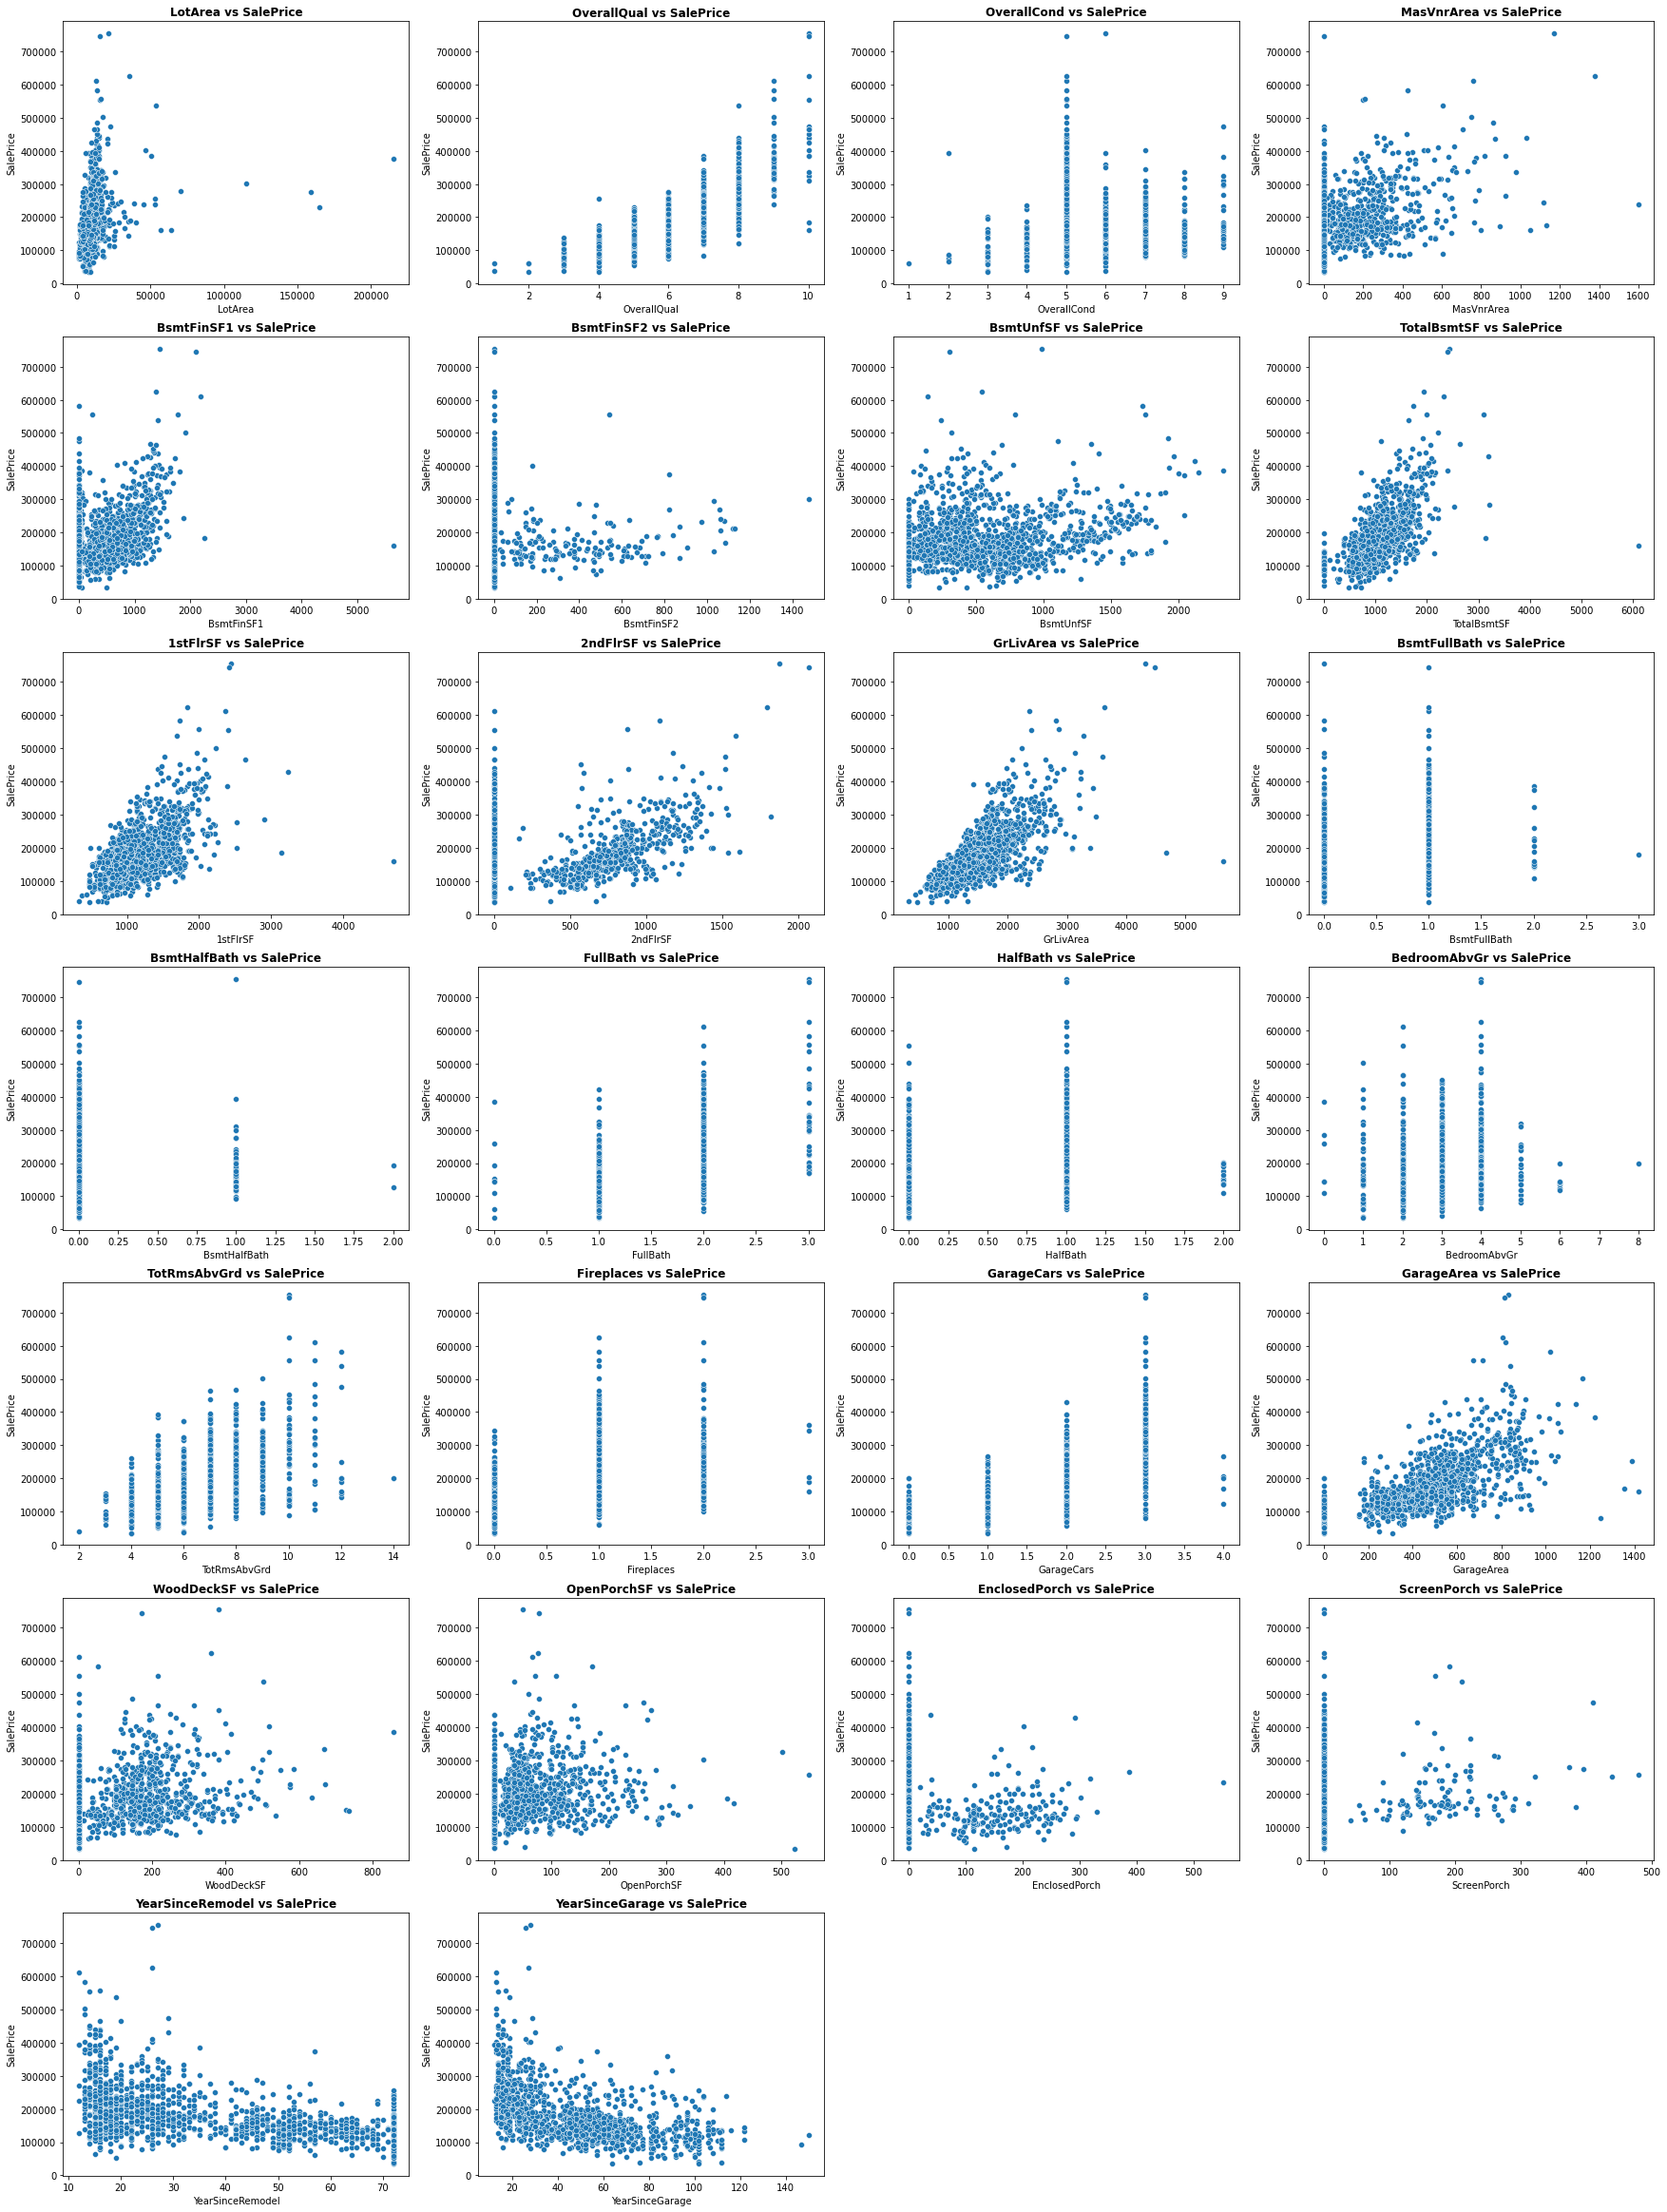

In [22]:
plt.figure(figsize=(30, 60))

count = 0
# Data analysis on numerical columns

target_column = 'SalePrice'
for column in surprise_housing_num_df.columns:
    if column != target_column:
        count += 1
        plt.subplot(10, 4, count)
        sns.scatterplot(surprise_housing_df[column], surprise_housing_df[target_column])
        plt.title(column + " vs " + target_column, weight='bold')

plt.show()

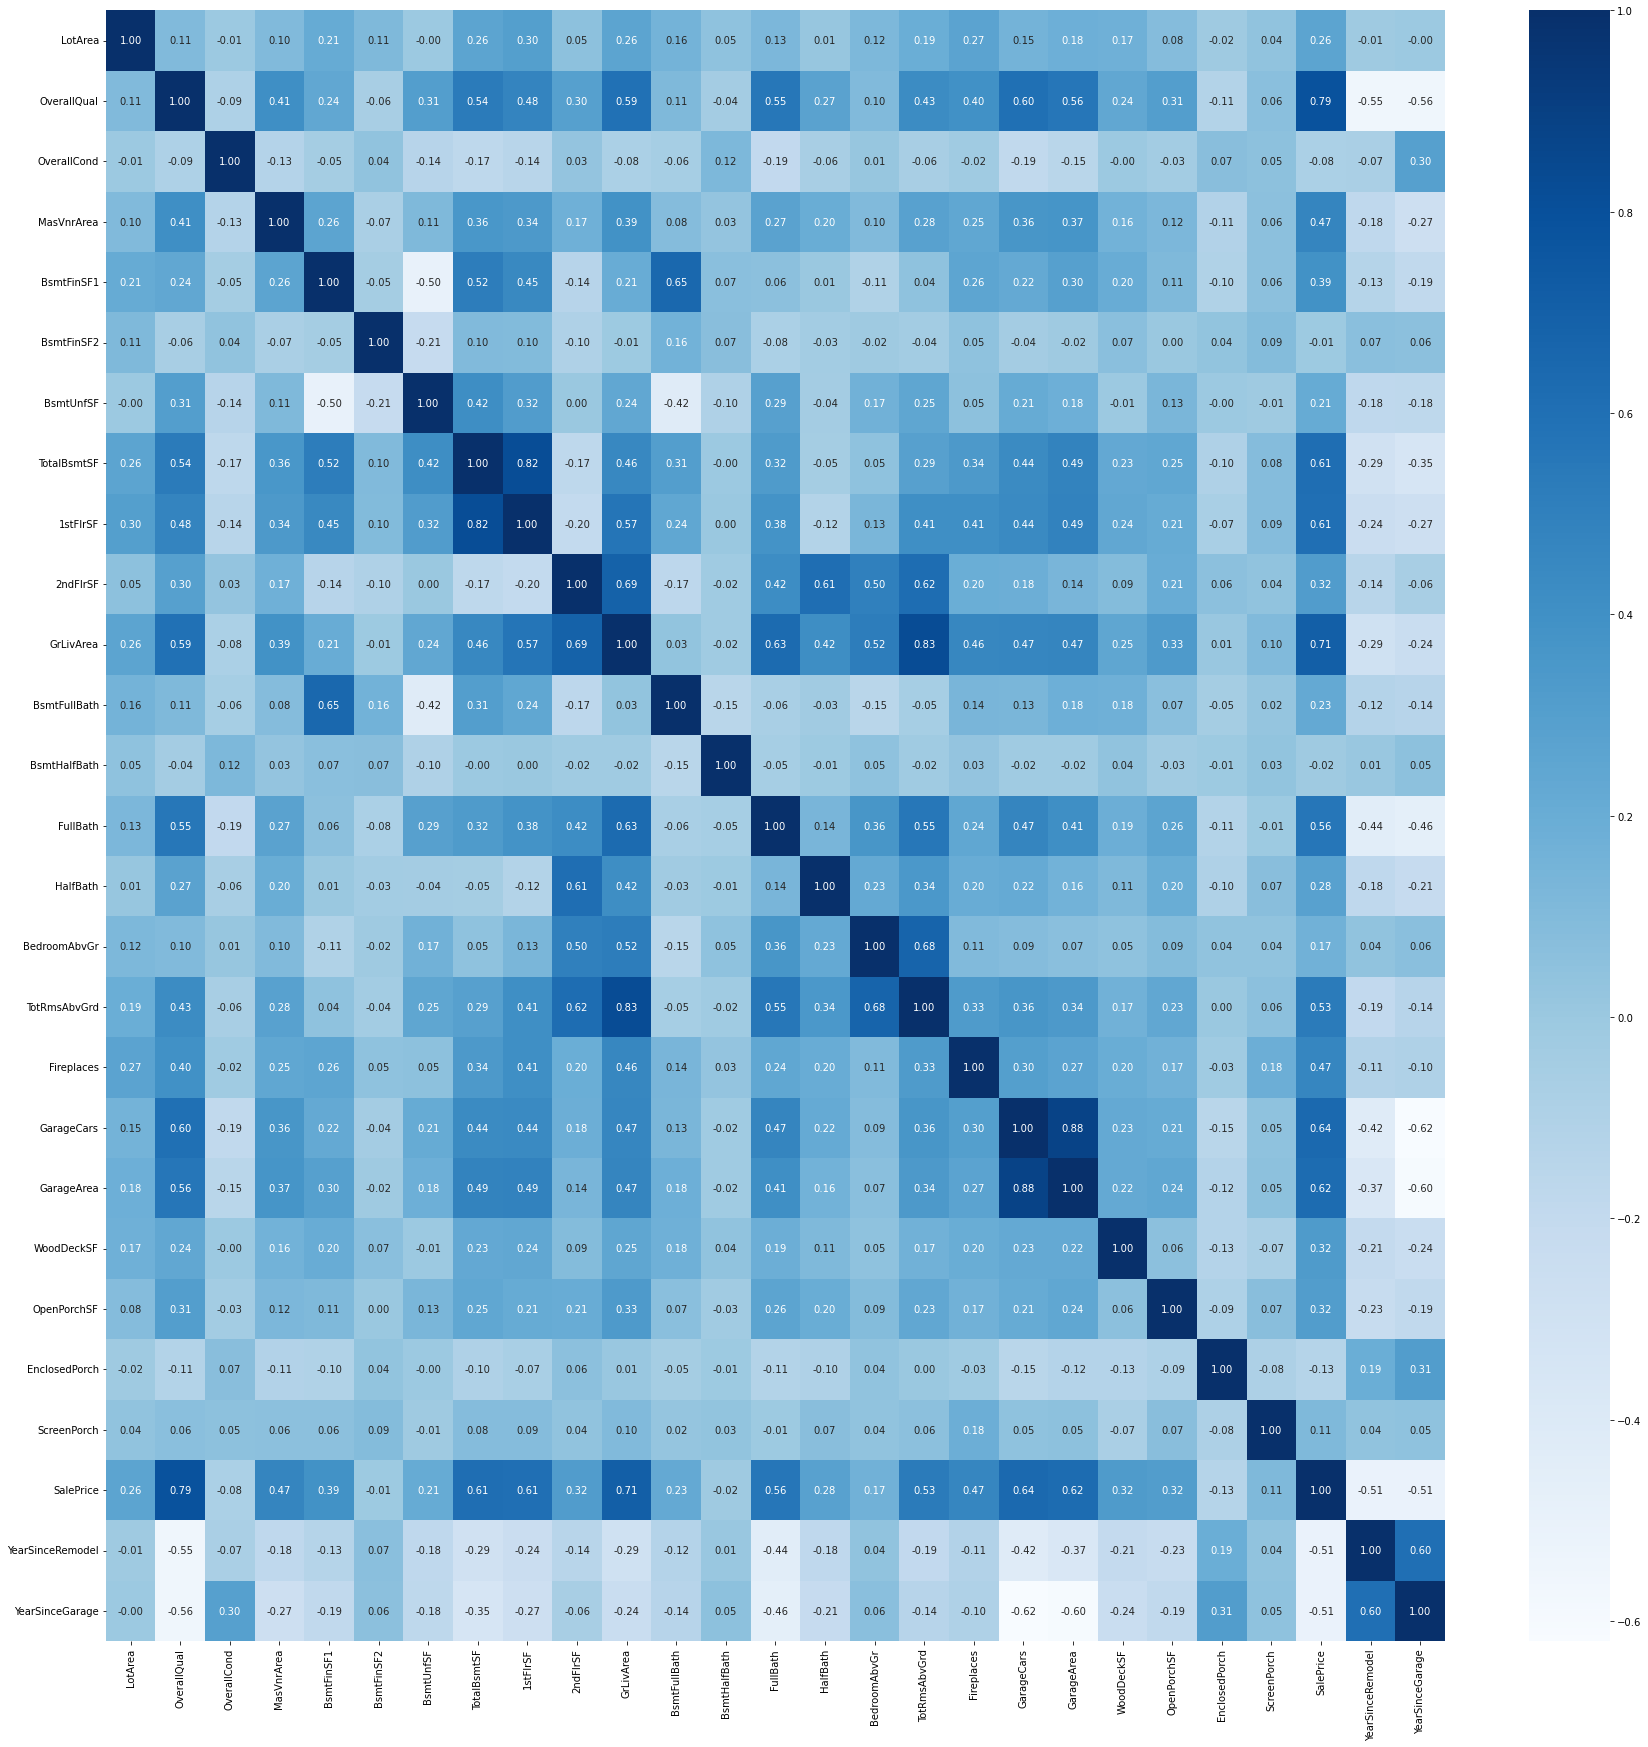

In [23]:
# Plotting Correlation graph

fig = plt.figure(figsize=(30, 30))

sns.heatmap(surprise_housing_num_df.corr(), annot = True, cmap="Blues", fmt='.2f')
plt.show()

In [24]:
# Create a new dataframe with only catogorical variables

catogorical_columns = list(set(surprise_housing_df.columns) - set(numerical_columns))

surprise_housing_cat_df = surprise_housing_df[catogorical_columns]

catogorical_columns

['BsmtCond',
 'GarageFinish',
 'MSZoning',
 'RoofStyle',
 'LotConfig',
 'SaleType',
 'HeatingQC',
 'BsmtQual',
 'BsmtFinType1',
 'MasVnrType',
 'Neighborhood',
 'KitchenQual',
 'BldgType',
 'Exterior2nd',
 'CentralAir',
 'ExterCond',
 'SaleCondition',
 'LandContour',
 'Exterior1st',
 'LandSlope',
 'FireplaceQu',
 'BsmtExposure',
 'Fence',
 'PavedDrive',
 'GarageType',
 'Alley',
 'HouseStyle',
 'ExterQual',
 'LotShape',
 'Electrical',
 'Condition1',
 'Foundation',
 'Functional',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2']

In [25]:
surprise_housing_cat_df.shape

(1459, 36)

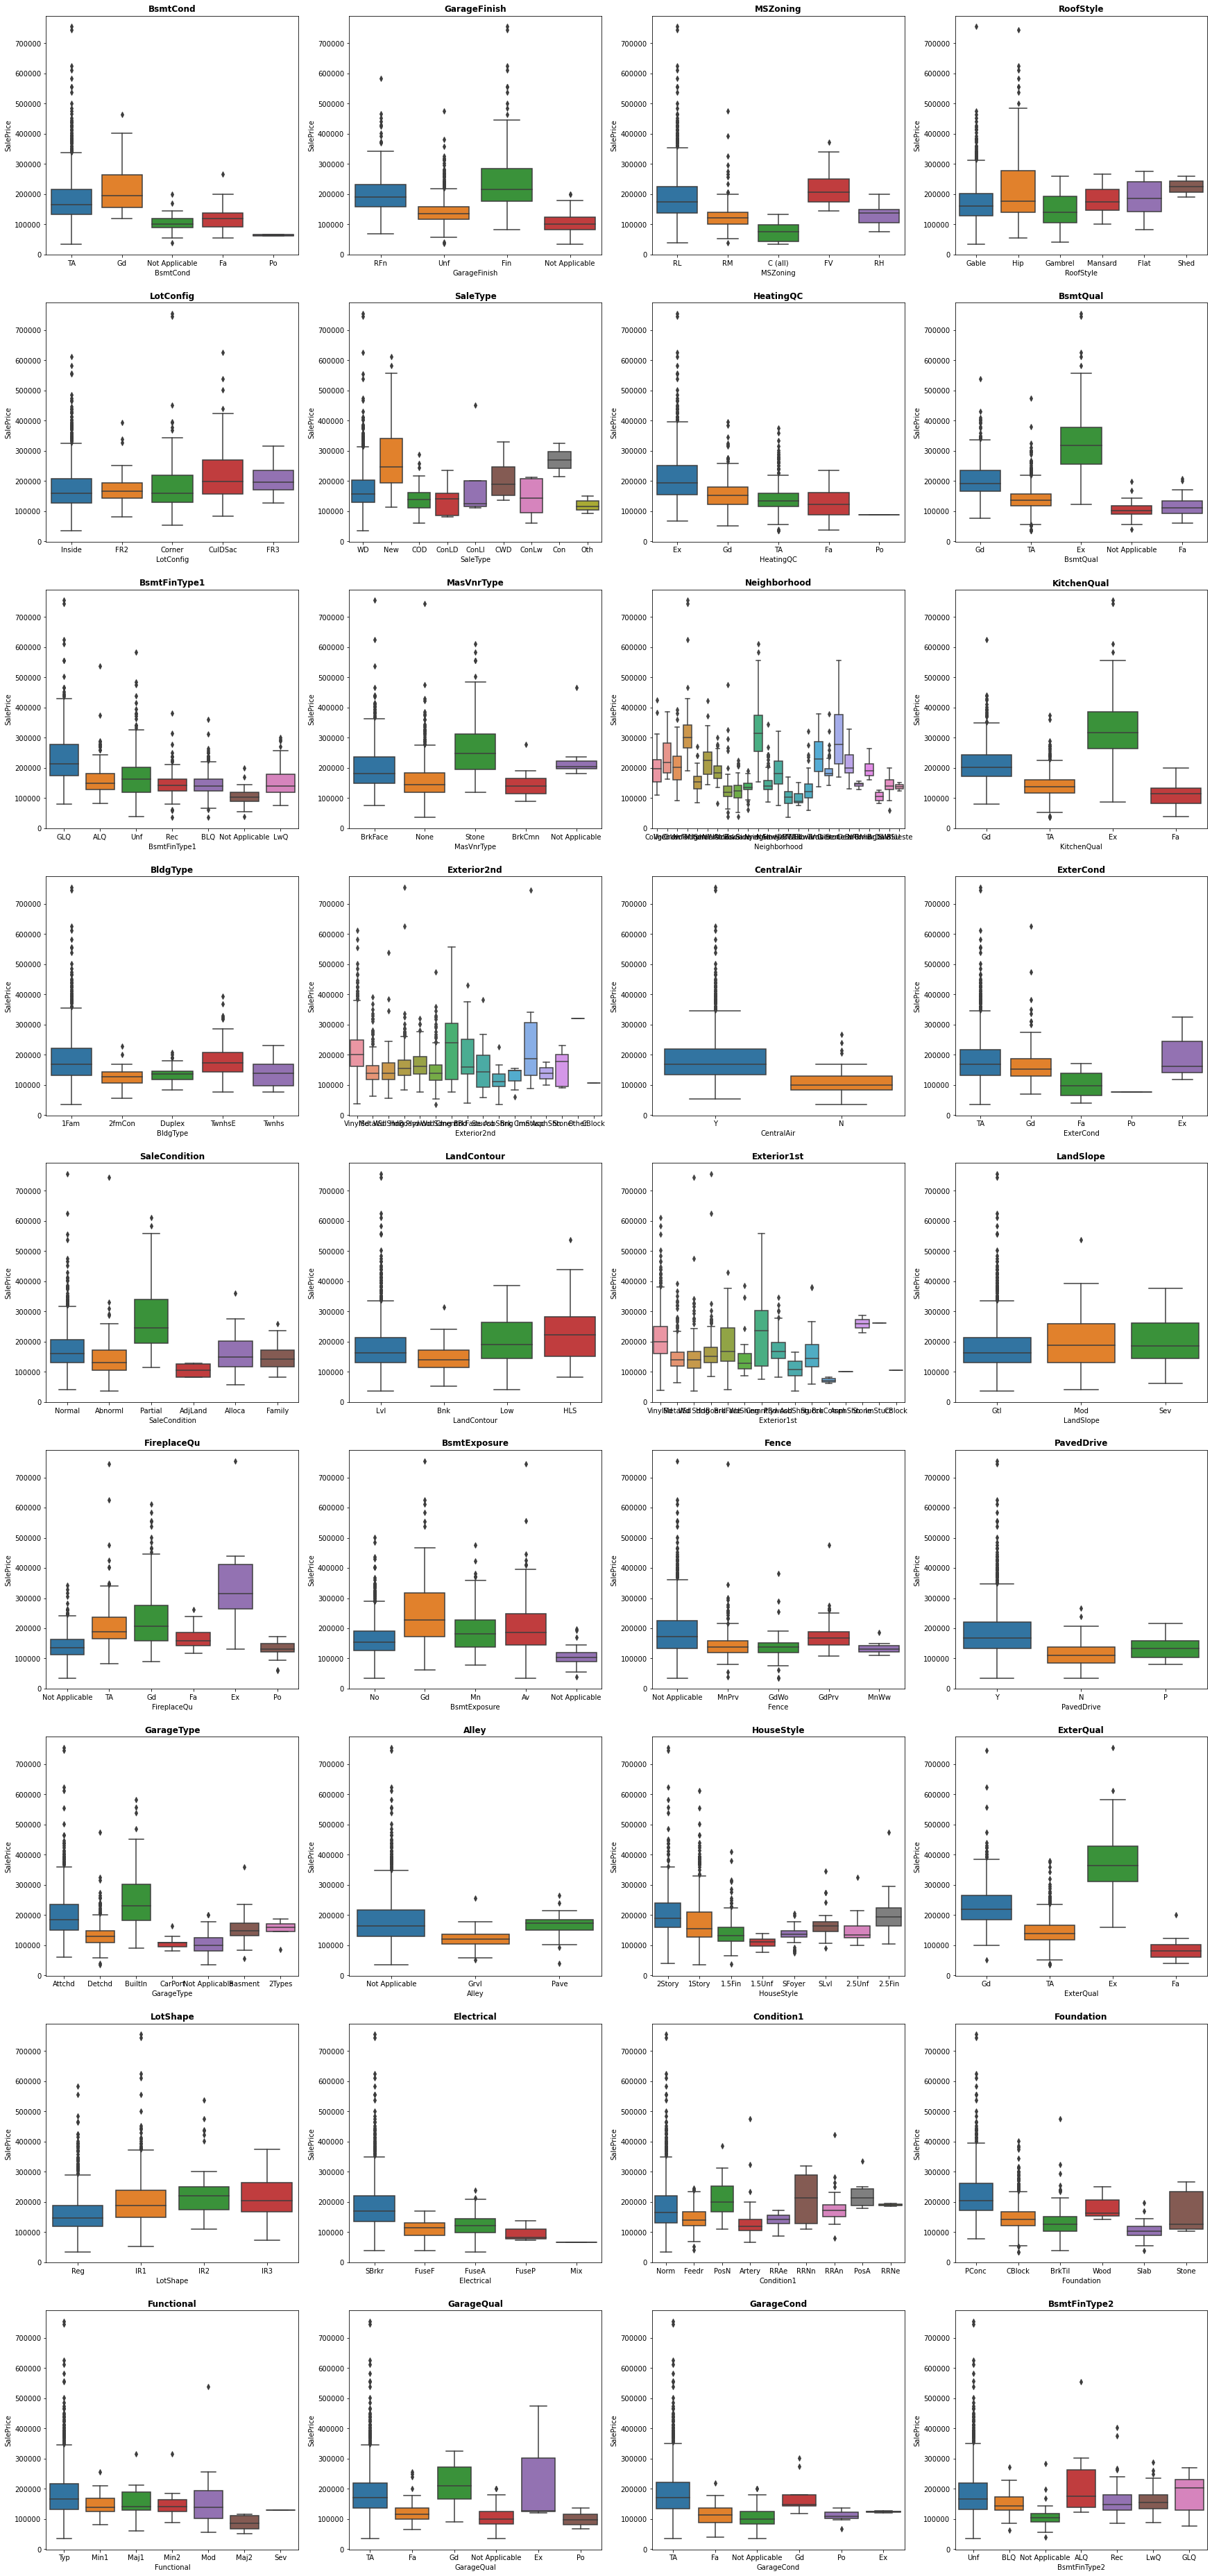

In [26]:
plt.figure(figsize=(30, 90))

count = 0
# Data analysis on catogorical columns

target_column = 'SalePrice'
for column in surprise_housing_cat_df.columns:
    if column != target_column:
        count += 1
        plt.subplot(12, 4, count)
        sns.boxplot(surprise_housing_df[column], surprise_housing_df[target_column])
        plt.title(column, weight = 'bold')

plt.show()

### Analysis on Target Variable

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

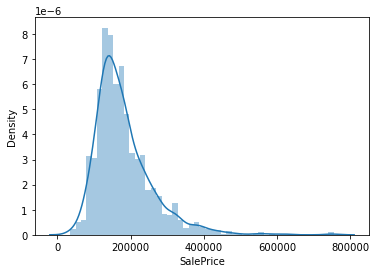

In [27]:
# Prediction error should be normally distributed. This is one of the importatnt assumption for
# Linear Regression. 

# One of the reason for non-normality of prediction error is dependent or independent variables
# being too non-normal.

sns.distplot(surprise_housing_df['SalePrice'])

In [28]:
# We could clearly see that target/dependent varibale is skewed.

# Lets tranform this variable and check

surprise_housing_num_df['ConvertedSalePrice'] = np.log(surprise_housing_df['SalePrice'])

<AxesSubplot:xlabel='ConvertedSalePrice', ylabel='Density'>

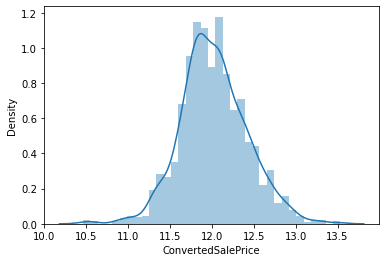

In [29]:
sns.distplot(surprise_housing_num_df['ConvertedSalePrice'])

# Seems the Target varibale is normally distributed now.

In [30]:
# Creating dummy varibles for catogorical data

surprise_housing_cat_dummies = pd.get_dummies(surprise_housing_cat_df, drop_first = True)

surprise_housing_cat_dummies.head()

,BsmtCond_Gd,BsmtCond_Not Applicable,BsmtCond_Po,BsmtCond_TA,GarageFinish_Not Applicable,GarageFinish_RFn,GarageFinish_Unf,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageCond_Gd,GarageCond_Not Applicable,GarageCond_Po,GarageCond_TA,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Not Applicable,BsmtFinType2_Rec,BsmtFinType2_Unf
0,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [31]:
surprise_housing_cat_dummies.shape

(1459, 196)

In [32]:
surprise_housing_df = pd.concat([surprise_housing_num_df, surprise_housing_cat_dummies], axis = 1)

surprise_housing_df.shape

(1459, 224)

In [33]:
surprise_housing_df.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCond_Gd,GarageCond_Not Applicable,GarageCond_Po,GarageCond_TA,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Not Applicable,BsmtFinType2_Rec,BsmtFinType2_Unf
0,8450,7,5,196.0,706,0,150,856,856,854,...,0,0,0,1,0,0,0,0,0,1
1,9600,6,8,0.0,978,0,284,1262,1262,0,...,0,0,0,1,0,0,0,0,0,1
2,11250,7,5,162.0,486,0,434,920,920,866,...,0,0,0,1,0,0,0,0,0,1
3,9550,7,5,0.0,216,0,540,756,961,756,...,0,0,0,1,0,0,0,0,0,1
4,14260,8,5,350.0,655,0,490,1145,1145,1053,...,0,0,0,1,0,0,0,0,0,1


### Scaling features

In [34]:
# split into train and test

surprise_housing_df_train, surprise_housing_df_test = train_test_split(surprise_housing_df, train_size = 0.7, random_state = 100)


In [35]:
# Testing dataframe shape

surprise_housing_df_train.shape

(1021, 224)

In [36]:
# Training dataframe shape

surprise_housing_df_test.shape

(438, 224)

In [37]:
# Setting up scaler
scaler = StandardScaler()

surprise_housing_df_train[numerical_columns] = scaler.fit_transform(surprise_housing_df_train[numerical_columns])
surprise_housing_df_train.head()

X_train = surprise_housing_df_train.drop(['SalePrice', 'ConvertedSalePrice'], axis=1)

y_train = surprise_housing_df_train['ConvertedSalePrice']

### Model Building - Lasso Regression

In [38]:
# list of alphas to tune - if value too high it will lead to underfitting and 
# if value is too low it will not handle overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000 ]}

In [39]:
# Apply Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score = True, verbose = 1)            

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
# Cross validation results

cross_validation_results = pd.DataFrame(model_cv.cv_results_)
cross_validation_results[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.072781,-0.096585
1,{'alpha': 0.001},-0.083012,-0.095127
2,{'alpha': 0.01},-0.104690,-0.109496
3,{'alpha': 0.05},-0.131710,-0.133839
4,{'alpha': 0.1},-0.165851,-0.167245
5,{'alpha': 0.2},-0.234989,-0.236253
6,{'alpha': 0.3},-0.295807,-0.296467
7,{'alpha': 0.4},-0.315279,-0.315542
8,{'alpha': 0.5},-0.315279,-0.315542
9,{'alpha': 0.6},-0.315279,-0.315542


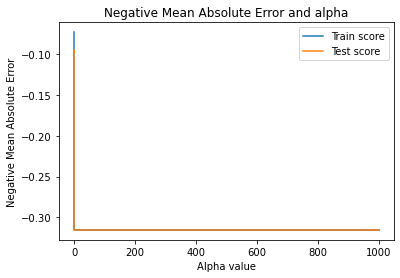

In [41]:
# Plotting mean test and train scores with alpha 
cross_validation_results['param_alpha'] = cross_validation_results['param_alpha'].astype('int32')

# Plotting
plt.plot(cross_validation_results['param_alpha'], cross_validation_results['mean_train_score'])
plt.plot(cross_validation_results['param_alpha'], cross_validation_results['mean_test_score'])
plt.xlabel('Alpha value')
plt.ylabel('Negative Mean Absolute Error')

plt.title('Negative Mean Absolute Error and alpha')
plt.legend(['Train score', 'Test score'])
plt.show()

In [42]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.001}


In [43]:
# Fitting Lasso model for alpha = 0.001 and printing coefficients which has been panalised

lasso = Lasso(alpha = model_cv.best_params_['alpha'])

lasso.fit(X_train, y_train)

y_pred_train_lasso = lasso.predict(X_train)
print('Training R2 Square : ', round(r2_score(y_train, y_pred_train_lasso), 2))

Training R2 Square :  0.9


In [44]:
surprise_housing_df_test[numerical_columns] = scaler.transform(surprise_housing_df_test[numerical_columns])

X_test = surprise_housing_df_test.drop(['SalePrice', 'ConvertedSalePrice'], axis=1)

y_test = surprise_housing_df_test['ConvertedSalePrice']

y_pred_test_lasso = lasso.predict(X_test)

print('Testing R2 Square : ', round(r2_score(y_test, y_pred_test_lasso), 2))

Testing R2 Square :  0.89


In [45]:
# Lasso model paramters

lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)

lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]

columns = X_train.columns
columns = columns.insert(0, "constant")

In [46]:
col_values = [col for col in list(zip(columns, lasso_model_parameters)) if abs(col[-1] != 0)]

lasso_params = pd.DataFrame(
    {
        'Feature': list(list(zip(*col_values))[0]),
        'Coefficient': list(list(zip(*col_values))[1])
    })

sorted_lasso_params = lasso_params.reindex(lasso_params.Coefficient.abs().sort_values(ascending = False).index)

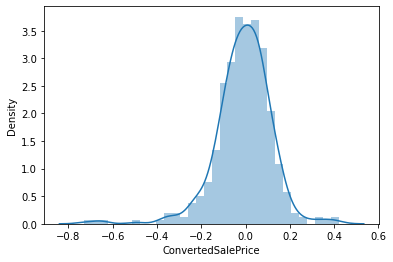

In [47]:
sns.distplot((y_test - y_pred_test_lasso))
plt.show()

In [48]:
# Fetching top 5 predictor features based on lasso regression
sorted_lasso_params[1:6]

,Feature,Coefficient
41,Neighborhood_Crawfor,0.111
46,Neighborhood_NridgHt,0.105
2,OverallQual,0.095
9,GrLivArea,0.085
53,BldgType_Twnhs,-0.079


In [49]:
# Additional exercise for Question No: 3 in the exercise where 5 important features
# and new model is generated to find the next best 5 predicter features

In [50]:
# Therefore, 5 most predictor values of lasso regression are Neighborhood_ClearCr, Neighborhood_ClearCr,
# OverallQual, GrLivArea, BldgType_2fmCon

In [51]:
surprise_housing_df_train_new = surprise_housing_df_train.drop(['Neighborhood_Crawfor', 'Neighborhood_NridgHt',
                                    'OverallQual', 'GrLivArea', 'BldgType_2fmCon'], axis = 1)

X_train_new = surprise_housing_df_train_new.drop(['SalePrice', 'ConvertedSalePrice'], axis = 1)

In [52]:
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.0001}


In [54]:
# Fitting Lasso model for alpha = 0.001 and printing coefficients which has been panalised

lasso = Lasso(alpha = model_cv.best_params_['alpha'])

lasso.fit(X_train_new, y_train)

Lasso(alpha=0.0001)

In [55]:
# Lasso model paramters

lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)

lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]

columns = X_train_new.columns
columns = columns.insert(0, "constant")

In [56]:
col_values = [col for col in list(zip(columns, lasso_model_parameters)) if abs(col[-1] != 0)]

lasso_params = pd.DataFrame(
    {
        'Feature': list(list(zip(*col_values))[0]),
        'Coefficient': list(list(zip(*col_values))[1])
    })

sorted_lasso_params = lasso_params.reindex(lasso_params.Coefficient.abs().sort_values(ascending = False).index)
sorted_lasso_params[1:11]

,Feature,Coefficient
29,MSZoning_RH,0.428
28,MSZoning_FV,0.405
30,MSZoning_RL,0.389
31,MSZoning_RM,0.371
70,Neighborhood_MeadowV,-0.322
67,Neighborhood_Edwards,-0.224
76,Neighborhood_OldTown,-0.188
69,Neighborhood_IDOTRR,-0.180
146,LotShape_IR3,-0.165
24,BsmtCond_Not Applicable,-0.152


In [57]:
# Fetching top 5 predictor features based on lasso regression
sorted_lasso_params[1:6]

,Feature,Coefficient
29,MSZoning_RH,0.428
28,MSZoning_FV,0.405
30,MSZoning_RL,0.389
31,MSZoning_RM,0.371
70,Neighborhood_MeadowV,-0.322


### Ridge Regression

In [58]:
# Apply Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score = True, verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
# Cross validation results

cross_validation_results = pd.DataFrame(model_cv.cv_results_)
cross_validation_results[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.071491,-0.103366
1,{'alpha': 0.001},-0.071492,-0.103345
2,{'alpha': 0.01},-0.071497,-0.103138
3,{'alpha': 0.05},-0.071538,-0.102413
4,{'alpha': 0.1},-0.071608,-0.101747
5,{'alpha': 0.2},-0.071770,-0.100908
6,{'alpha': 0.3},-0.071954,-0.100313
7,{'alpha': 0.4},-0.072136,-0.099904
8,{'alpha': 0.5},-0.072313,-0.099592
9,{'alpha': 0.6},-0.072480,-0.099372


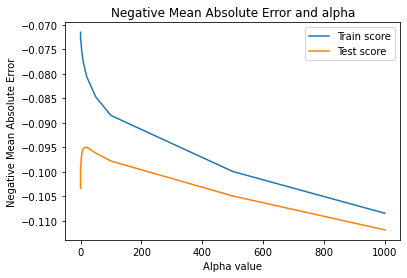

In [60]:
# Plotting mean test and train scores with alpha 
cross_validation_results['param_alpha'] = cross_validation_results['param_alpha'].astype('int32')

# Plotting
plt.plot(cross_validation_results['param_alpha'], cross_validation_results['mean_train_score'])
plt.plot(cross_validation_results['param_alpha'], cross_validation_results['mean_test_score'])
plt.xlabel('Alpha value')
plt.ylabel('Negative Mean Absolute Error')

plt.title('Negative Mean Absolute Error and alpha')
plt.legend(['Train score', 'Test score'])
plt.show()

In [61]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 20}


In [62]:
# Fitting ridge model for alpha = 20 and printing coefficients which has been panalised

ridge = Ridge(alpha = model_cv.best_params_['alpha'])

ridge.fit(X_train, y_train)

y_pred_train_ridge = ridge.predict(X_train)
print('Training R2 Square : ', round(r2_score(y_train, y_pred_train_ridge), 2))

Training R2 Square :  0.91


In [63]:
y_pred_test_ridge = ridge.predict(X_test)

print('Testing R2 Square : ', round(r2_score(y_test, y_pred_test_ridge), 2))

Testing R2 Square :  0.89


In [64]:
# Ridge model paramters

ridge_model_parameters = list(ridge.coef_)
ridge_model_parameters.insert(0, ridge.intercept_)

ridge_model_parameters = [round(x, 3) for x in ridge_model_parameters]

columns = X_train.columns
columns = columns.insert(0, "constant")

In [65]:
col_values = [col for col in list(zip(columns, ridge_model_parameters)) if abs(col[-1] != 0)]

ridge_params = pd.DataFrame(
    {
        'Feature': list(list(zip(*col_values))[0]),
        'Coefficient': list(list(zip(*col_values))[1])
    })

sorted_ridge_params = ridge_params.reindex(ridge_params.Coefficient.abs().sort_values(ascending = False).index)
sorted_ridge_params[1:11]

,Feature,Coefficient
2,OverallQual,0.084
78,Neighborhood_Crawfor,0.082
88,Neighborhood_NridgHt,0.070
79,Neighborhood_Edwards,-0.066
132,Exterior1st_BrkFace,0.060
185,Condition1_Norm,0.054
102,BldgType_Twnhs,-0.054
118,CentralAir_Y,0.052
68,BsmtFinType1_Unf,-0.052
81,Neighborhood_IDOTRR,-0.052


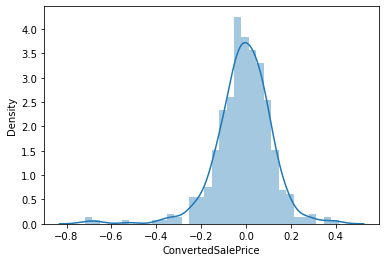

In [66]:
sns.distplot((y_test - y_pred_test_ridge))
plt.show()

In [67]:
# Doubling alpha scores for lasso regression to check the changes in most predictive variables
# Below analysis is to answer Question1 of the subjective assignment.

lasso = Lasso(alpha = 0.002)

lasso.fit(X_train, y_train)

y_pred_train_lasso = lasso.predict(X_train)
print('Training R2 Square : ', round(r2_score(y_train, y_pred_train_lasso), 2))


Training R2 Square :  0.89


In [68]:
y_pred_test_lasso = lasso.predict(X_test)

print('Testing R2 Square : ', round(r2_score(y_test, y_pred_test_lasso), 2))

Testing R2 Square :  0.88


In [69]:
# Lasso model paramters

lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)

lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]

columns = X_train.columns
columns = columns.insert(0, "constant")

In [70]:
col_values = [col for col in list(zip(columns, lasso_model_parameters)) if abs(col[-1] != 0)]

lasso_params = pd.DataFrame(
    {
        'Feature': list(list(zip(*col_values))[0]),
        'Coefficient': list(list(zip(*col_values))[1])
    })

sorted_lasso_params = lasso_params.reindex(lasso_params.Coefficient.abs().sort_values(ascending = False).index)

In [71]:
sorted_lasso_params[1:11]

,Feature,Coefficient
2,OverallQual,0.107
8,GrLivArea,0.077
32,Neighborhood_Crawfor,0.068
34,Neighborhood_NridgHt,0.064
41,CentralAir_Y,0.061
35,Neighborhood_Somerst,0.059
16,GarageCars,0.053
54,Condition1_Norm,0.052
33,Neighborhood_Edwards,-0.051
23,MSZoning_RL,0.047


In [72]:
# Doubling alpha scores for ridge regression to check the changes in most predictive variables
# Below analysis is to answer Question1 of the subjective assignment.

ridge = Ridge(alpha = 40)

ridge.fit(X_train, y_train)

y_pred_train_ridge = ridge.predict(X_train)
print('Training R2 Square : ', round(r2_score(y_train, y_pred_train_ridge), 2))

Training R2 Square :  0.9


In [73]:
y_pred_test_ridge = ridge.predict(X_test)

print('Testing R2 Square : ', round(r2_score(y_test, y_pred_test_ridge), 2))

Testing R2 Square :  0.89


In [74]:
# Ridge model paramters

ridge_model_parameters = list(ridge.coef_)
ridge_model_parameters.insert(0, ridge.intercept_)

ridge_model_parameters = [round(x, 3) for x in ridge_model_parameters]

columns = X_train.columns
columns = columns.insert(0, "constant")

In [75]:
col_values = [col for col in list(zip(columns, ridge_model_parameters)) if abs(col[-1] != 0)]

ridge_params = pd.DataFrame(
    {
        'Feature': list(list(zip(*col_values))[0]),
        'Coefficient': list(list(zip(*col_values))[1])
    })

sorted_ridge_params = ridge_params.reindex(ridge_params.Coefficient.abs().sort_values(ascending = False).index)
sorted_ridge_params[1:11]

,Feature,Coefficient
2,OverallQual,0.087
76,Neighborhood_Crawfor,0.058
77,Neighborhood_Edwards,-0.052
86,Neighborhood_NridgHt,0.051
3,OverallCond,0.046
181,Condition1_Norm,0.046
19,GarageCars,0.045
115,CentralAir_Y,0.044
11,GrLivArea,0.043
66,BsmtFinType1_Unf,-0.043
